# Numerical Methods - Usage

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Finding Roots

There are two different methods of finding roots; Directly from data or by passing a function into the solver

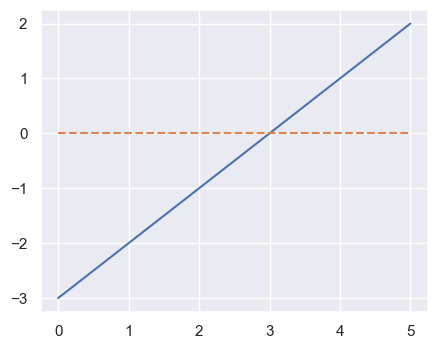

In [2]:
# creating some data
def y_func(xin):
    return xin - 3

x = np.linspace(0, 5, 150)
y = y_func(x)

plt.figure(figsize=(5, 4), dpi=100)
plt.plot(x, y)
plt.plot(x, np.zeros(len(x)), linestyle='--')
plt.show()

Data method:

In [3]:
from find_roots import find_root_data

In [4]:
# finding root with secant method
find_root_data(x, y, 4, method='secant')

3.0

In [5]:
# finding root with bisection method
find_root_data(x, y, [1, 4.5], method='bisection')

2.99993896484375

Function method:

In [6]:
from find_roots import find_root_function

In [7]:
# finding root with secant method
find_root_function(y_func, 4, method='secant')

3.0

In [8]:
# finding root with bisection method
find_root_function(y_func, [1, 4.5], method='bisection')

2.99993896484375

## Solving ODEs (Initial Value Problem)
Basic 4th order Runge-Kutte method:

In [9]:
from solve_ivp import rk_4

In [10]:
dydx = lambda t, y: -2*y

In [11]:
y_out, t_out = rk_4(dydx, y_init=1, t_init=0, t_final=2)

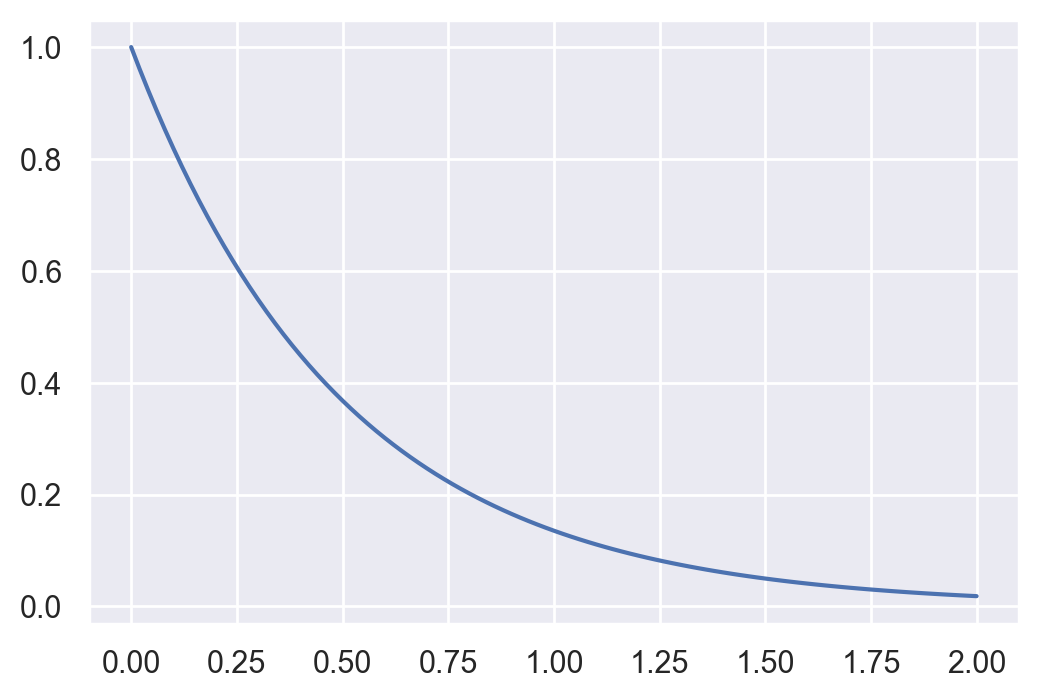

In [12]:
plt.figure(dpi=200)
plt.plot(t_out, y_out)
plt.show()

Runge-Kutte 4(5) method (variable step size):

In [13]:
from solve_ivp import rk_45

In [14]:
y_out_45, t_out_45 = rk_45(dydx, y_init=1, t_init=0, t_final=2, tolerance=0.15, beta=0.8)

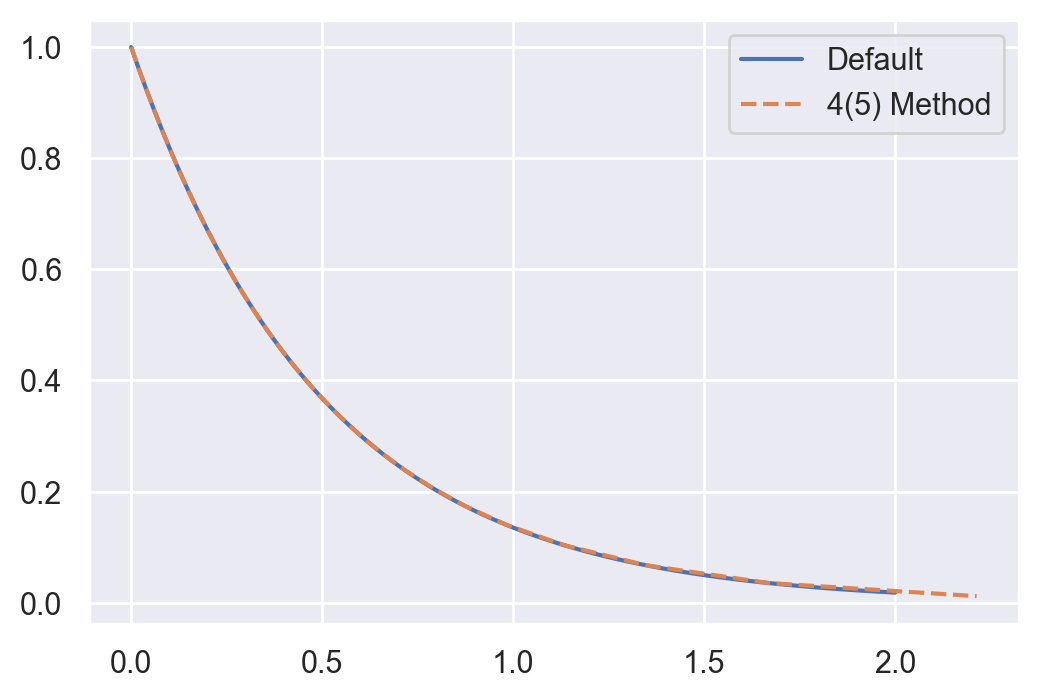

In [15]:
plt.figure(dpi=200)
plt.plot(t_out, y_out, label='Default')
plt.plot(t_out_45, y_out_45, label='4(5) Method', linestyle='--')
plt.legend()
plt.show()